# Ejercicio 1
* Dados dos vectores A y B, calcular su producto escalar

In [1]:
import numpy as np
import time

N = 10_000
timing = {}
rng = np.random.default_rng(seed=42)

A = rng.random((N))
B = rng.random((N))

t1 = time.time()
dot_product = 0
for i in range(N):
    dot_product += A[i] * B[i]
t2 = time.time()
loop = t2-t1
timing['loop'] = loop
print("Elapsed ", t2-t1)

Elapsed  0.008240938186645508


In [2]:
t1 = time.time()

# ToDo
dot_product = np.dot(A, B)
t2 = time.time()

numpy = t2-t1

timing['numpy'] = numpy
print("Elapsed ", t2-t1)

Elapsed  0.0010657310485839844


<BarContainer object of 2 artists>

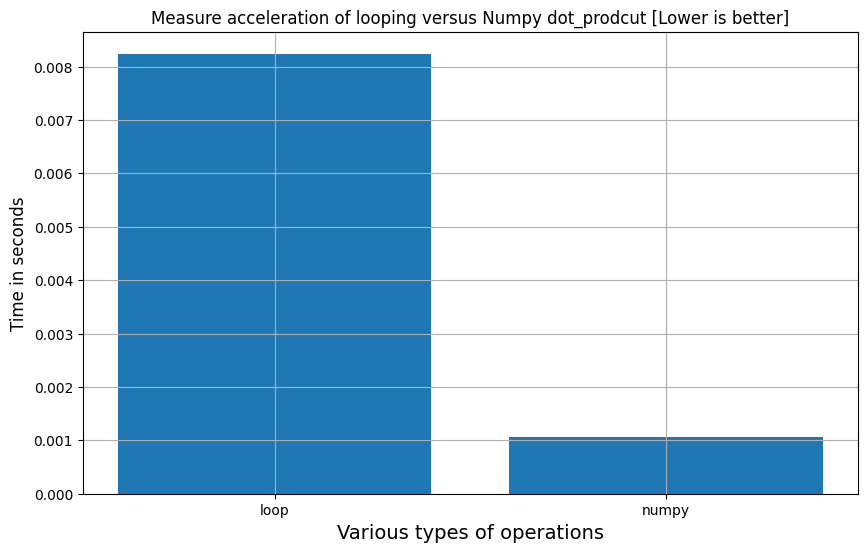

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy dot_prodcut [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

# Ejercicio 2
* Dada una matriz 10x10, cuya primera fila corresponde con los números 1, 2, 3.... y la primera columna contiene la secuancia 1, 2, 3, 4....
    1. Calcule la tabla de multiplicar de cada coordenada
    2. Aquel resultado que es **múltiplos de 12** y **todos los múltiplos de 9** permanecerá en la tabla
    3. En caso contrario su valor se volverá a cero

La matriz contendrá el siguiente contenido:
```
array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  0,  0,  0,  0, 12,  0,  0, 18,  0],
       [ 3,  0,  9, 12,  0, 18,  0, 24, 27,  0],
       [ 4,  0, 12,  0,  0, 24,  0,  0, 36,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 6, 12, 18, 24,  0, 36,  0, 48, 54, 60],
       [ 7,  0,  0,  0,  0,  0,  0,  0, 63,  0],
       [ 8,  0, 24,  0,  0, 48,  0,  0, 72,  0],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81, 90],
       [10,  0,  0,  0,  0, 60,  0,  0, 90,  0]])
```

* **Ayuda**: La operación ```np.where( MultiplicationTable == 24``` devuelve los índices cuyo valor es equivalente a 24

In [26]:
import numpy as np
N = 10
numLine = np.arange(1, N+1).reshape(N,1)
MultiplicationTable = numLine * numLine.T
################### add code here ###########
multiplos = (MultiplicationTable[1:,1:] % 12 == 0) | (MultiplicationTable[1:,1:] % 9 == 0)
MultiplicationTable[1:, 1:] = np.where(multiplos, MultiplicationTable[1:, 1:], 0)
#############################################

In [27]:
MultiplicationTable

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  0,  0,  0,  0, 12,  0,  0, 18,  0],
       [ 3,  0,  9, 12,  0, 18,  0, 24, 27,  0],
       [ 4,  0, 12,  0,  0, 24,  0,  0, 36,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 6, 12, 18, 24,  0, 36,  0, 48, 54, 60],
       [ 7,  0,  0,  0,  0,  0,  0,  0, 63,  0],
       [ 8,  0, 24,  0,  0, 48,  0,  0, 72,  0],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81, 90],
       [10,  0,  0,  0,  0, 60,  0,  0, 90,  0]])

# Ejercicio 3
* En finanzas matemáticas, la ecuación de Black-Scholes es una ecuación diferencial parcial (PDE) que rige la evolución del precio de una opción europea de compra o venta europea según el modelo de [Black-Scholes](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_equation)

* Una fórmula de negociación de opciones financieras utilizada para el precio de inversión estimados
* La fórmula calcula el precio de las opciones europeas 'put' y 'call'

###  Version bucle
* La función *black_scholes* se implementa con un bucle que calcula las opciones 'put' y 'call'
* Sustituir dicha tipología en forma de bucle por llamadas a la librería **NumPy** para acelerar dicha función

In [28]:
import numpy.random as rnd

# make xrange available in python 3
try:
    xrange
except NameError:
    xrange = range

SEED = 7777777
S0L = 10.0
S0H = 50.0
XL = 10.0
XH = 50.0
TL = 1.0
TH = 2.0
RISK_FREE = 0.1
VOLATILITY = 0.2
TEST_ARRAY_LENGTH = 1024

###############################################

def gen_data(nopt):
    return (
        rnd.uniform(S0L, S0H, nopt),
        rnd.uniform(XL, XH, nopt),
        rnd.uniform(TL, TH, nopt),
        )

from math import log, sqrt, exp, erf
import numpy as np
invsqrt = lambda x: 1.0/sqrt(x)

def black_scholes ( nopt, price, strike, t, rate, vol, call, put ):
    mr = -rate
    sig_sig_two = vol * vol * 2

    for i in range(nopt):
        P = float( price [i] )
        S = strike [i]
        T = t [i]

        a = log(P / S)
        b = T * mr

        z = T * sig_sig_two
        c = 0.25 * z
        y = invsqrt(z)

        w1 = (a - b + c) * y
        w2 = (a - b - c) * y

        d1 = 0.5 + 0.5 * erf(w1)
        d2 = 0.5 + 0.5 * erf(w2)

        Se = exp(b) * S

        call [i] = P * d1 - Se * d2
        put [i] = call [i] - P + Se


In [36]:
import time

timing = {}

nopt=1_000_000

price, strike, t = gen_data(nopt)
call = [0.0 for i in range(nopt)]
put = [-1.0 for i in range(nopt)]
price=list(price)
strike=list(strike)
t=list(t)


t1=time.time()
black_scholes(nopt, price, strike, t, RISK_FREE, VOLATILITY, call, put)
t2 = time.time()
print("With for loop and appending it took {} seconds".format(t2-t1))
timing['loop'] = (t2-t1)


With for loop and appending it took 0.8772642612457275 seconds


###  Version NumPy
* Implementar la función *black_scholes_numpy* que calcule las opciones 'put' y 'call' pero utilizando notación numpy para acelerar el 
* La invocación de la función **erf** se realizar haciendo uso de la función [scipy.special.erf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html) que tiene soporte de datos array de numpy

In [37]:
import scipy as sc


def black_scholes_numpy ( nopt, price, strike, t, rate, vol, call, put ):
    # ToDo
    mr = -rate
    sig_sig_two = vol * vol * 2
    
    a = np.log(price / strike)
    b = t * mr
    z = t * sig_sig_two
    c = 0.25 * z
    y = 1.0 / np.sqrt(z)

    w1 = (a - b + c) * y
    w2 = (a - b - c) * y

    d1 = 0.5 + 0.5 * sc.special.erf(w1)
    d2 = 0.5 + 0.5 * sc.special.erf(w2)

    Se = np.exp(b) * strike

    call = price * d1 - Se * d2
    put = call - price + Se

    return call, put
    


In [38]:
import numpy as np
t1=time.time()
black_scholes_numpy(nopt, np.array(price), np.array(strike), np.array(t), RISK_FREE, VOLATILITY, call, put)
t2 = time.time()
print("With for Numpy it took {} seconds".format(t2-t1))
timing['numpy'] = (t2-t1)
print("SpeedUp gain: ", timing['loop']/timing['numpy'])


With for Numpy it took 0.21872854232788086 seconds
SpeedUp gain:  4.01074433134877
